# Visualization using Matplotlib
# Uses Pandas and Numpy
# Requires many lines of code
# Highly customizable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

C:\Users\lenovo\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


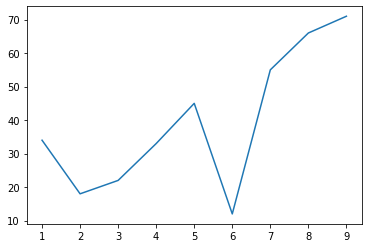

In [7]:
# 1.simple chat 
fig,ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9],[34,18,22,33,45,12,55,66,71])

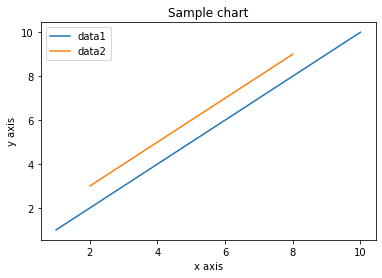

In [14]:
# 2. multi attribute trend in a chart / multi line chart

# declare a chart with one axis 
fig,ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],label='data1')
ax.plot([2,4,6,8],[3,5,7,9],label='data2')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('Sample chart')
ax.legend()



In [20]:
# above chart on real data
import pandas as pd 

# kaggle data of 'netflix title'

netflix_data = pd.read_csv("C:/Users/lenovo/python/EDA/netflix_titles.csv")
print(netflix_data.shape)
netflix_data.head()


(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [33]:
# fetching type of shows for respective year using group by

n_data = netflix_data.groupby(['release_year','type'],as_index=False).show_id.count()
n_data.head()

,release_year,type,show_id
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


In [23]:
netflix_data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [61]:
# pivot data to seprate 'type'
n_data_pivot = n_data.pivot(index='release_year',columns='type',values='show_id')
n_data_p = pd.pivot_table(n_data,index='release_year',columns='type',values='show_id')
n_data_p.fillna(0,inplace=True)
#print(n_data_pivot)

n_data_pivot.head()

n_data_pi =n_data_p.reset_index(drop=False)
print(n_data_pi.head())

type  release_year  Movie  TV Show
0             1925    0.0      1.0
1             1942    2.0      0.0
2             1943    3.0      0.0
3             1944    3.0      0.0
4             1945    3.0      0.0


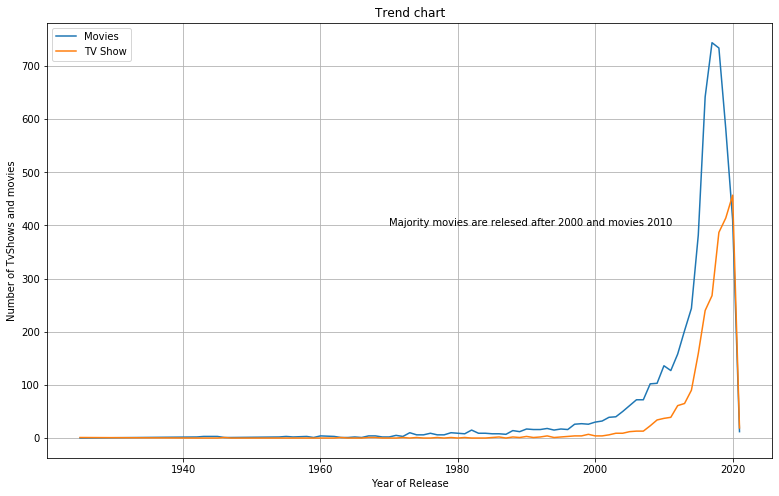

In [77]:
# Trend chart
fig,ax = plt.subplots()
# creating some dummy data
ax.plot(n_data_pi.release_year,n_data_pi.Movie,label = 'Movies')
ax.plot(n_data_pi.release_year,n_data_p['TV Show'],label = 'TV Show')
ax.set_ylabel('Number of TvShows and movies')
ax.set_xlabel('Year of Release')
ax.set_title('Trend chart')
fig.set_size_inches(13,8)
plt.text(x=1970,y=400,s=r'Majority movies are relesed after 2000 and movies 2010')
plt.grid()
ax.legend()

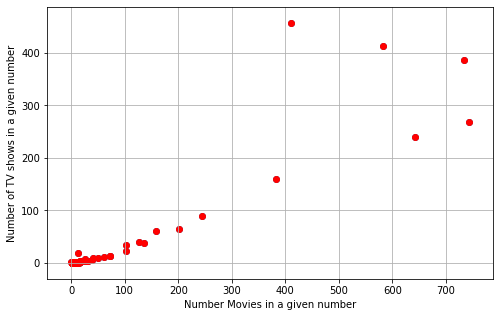

In [95]:
# scatter plot
fig1,ax1 = plt.subplots()
plt.scatter(n_data_pi['Movie'],n_data_pi['TV Show'])
plt.scatter(n_data_pi['Movie'],n_data_pi['TV Show'],color='red')
ax1.set_xlabel('Number Movies in a given number')
ax1.set_ylabel('Number of TV shows in a given number')
fig1.set_size_inches(8,5)
plt.rcParams.update({'font.size':10})
plt.grid()
plt.show()




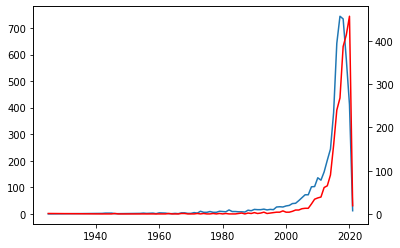

In [99]:
# dual chart chart 
 # when data range of two columns are different
    # 1. in 100 and 2 in 10000 so for scaling we use dual chart

# declare a chart with an axes
fig,ax=plt.subplots()
ax.plot(n_data_pi.release_year,n_data_pi.Movie,label='Movies')
ax2 = ax.twinx()
ax2.plot(n_data_pi.release_year,n_data_pi['TV Show'],label='Tv shows',color = 'red')

In [105]:
# BAR chart 
# preparing the data for bar chart 

netflix_data['year_added']= netflix_data['date_added'].str.slice(start=-4)
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [115]:
n_data_added = netflix_data.groupby(['year_added','type'],as_index = False).show_id.count()
n_data_added.columns = ['year_added','type','count']
n_data_added = n_data_added.pivot(index='year_added',columns='type',values = 'count')
n_data_added.fillna(0,inplace=True)
n_data_added

n_data_added =n_data_added.reset_index(drop=False)
print(n_data_added.head())

type year_added  Movie  TV Show
0          2008    1.0      1.0
1          2009    2.0      0.0
2          2010    1.0      0.0
3          2011   13.0      0.0
4          2012    3.0      0.0


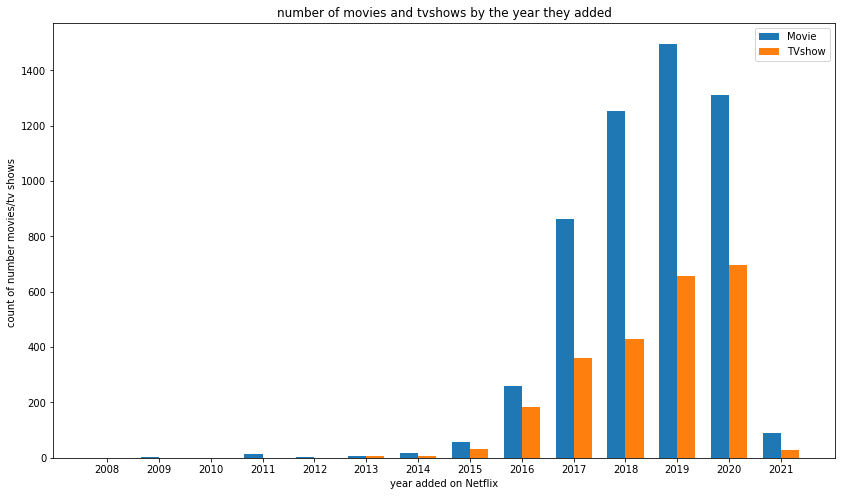

In [133]:
# bar chart

labels = n_data_added['year_added']
x = np.arange(len(labels)) # the label locations
width = 0.35 # width of the bars

fig,ax = plt.subplots()
Movie_reacts = ax.bar(x - width/2,n_data_added['Movie'],width, label='Movie')
tv_shows_reacts = ax.bar(x+ width/2,n_data_added['TV Show'],width,label='TVshow')

# add some text for labels , title ,chartsize

ax.set_xlabel('year added on Netflix')
ax.set_ylabel('count of number movies/tv shows ')
ax.set_title('number of movies and tvshows by the year they added')

ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(14,8)
ax.legend()


In [138]:
# function to generate labels on top of the bars
def gen_label(rects):
     #"""Attach a text label above each bar in *rects*
    for rect  in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/2,height),
                    xytext = (0,3), #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center',va = 'bottom'
                   )
        
gen_label(Movie_reacts)
gen_label(tv_shows_reacts)

fig.tight_layout()
plt.show()

In [139]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

        
autolabel(Movie_reacts, "left")
autolabel(tv_shows_reacts, "right")

plt.show()

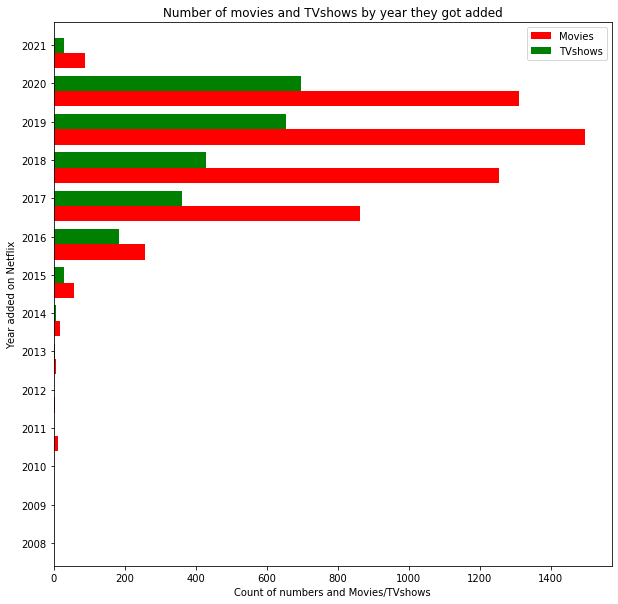

In [146]:
# horizontal bar chart
data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                        Movie = n_data_added['Movie'],TVshow = n_data_added['TV Show']))

ind = np.arange(len(data))
width = 0.4

fig1,ax1 = plt.subplots()
ax1.barh(ind, data.Movie,width,color='red',label ='Movies')
ax1.barh(ind+width,data.TVshow,width,color = 'green',label='TVshows')
ax1.set(yticks = ind+width,yticklabels=data.Year,ylim=[2*width-1,len(data)])

ax1.set_ylabel('Year added on Netflix')
ax1.set_xlabel('Count of numbers and Movies/TVshows') 
ax1.set_title('Number of movies and TVshows by year they got added')

ax1.legend()
fig1.set_size_inches(10,10)
plt.show()

In [154]:
#******************  Pie chart *********************#
  #******** for categorical data
# creating new total column    
n_data_added['Total'] = n_data_added['Movie'] + n_data_added['TV Show']

# to select last few raws only
n_data_added_fit = n_data_added[-5:]
n_data_added_fit = n_data_added_fit.reset_index(drop=True)
n_data_added_fit.head()

type,year_added,Movie,TV Show,Total
0,2017,864.0,361.0,1225.0
1,2018,1255.0,430.0,1685.0
2,2019,1497.0,656.0,2153.0
3,2020,1312.0,697.0,2009.0
4,2021,88.0,29.0,117.0


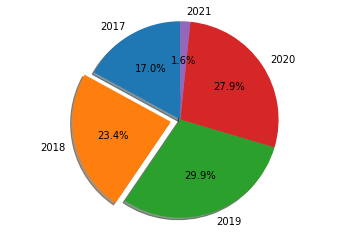

In [155]:
# Pie chart

labels = n_data_added_fit['year_added']
sizes = n_data_added_fit['Total']
explode = (0,0.1,0,0,0) # only explode the third slice

fig2,ax2 = plt.subplots()
ax2.pie(sizes,explode = explode , labels = labels,autopct ='%1.1f%%',
        shadow = True,startangle=90)
ax2.axis('equal') # equal aspect ratio ensures that pie is drawn as a circle

plt.show()

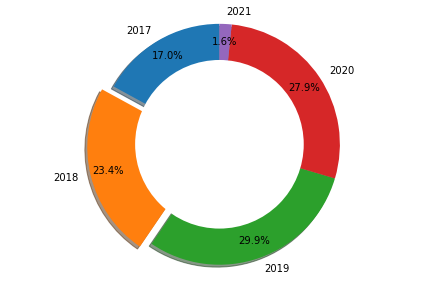

In [160]:
# modifying pie chart - donut chart


labels = n_data_added_fit['year_added']
sizes = n_data_added_fit['Total']
explode = (0,0.1,0,0,0) # only explode the third slice

fig2,ax2 = plt.subplots()
ax2.pie(sizes,explode = explode , labels = labels,autopct ='%1.1f%%',
        shadow = True,startangle=90,pctdistance=0.85) # adjust font location

# draw circle / hollow circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)


## equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal') 
plt.tight_layout()
plt.show()



Text(0.5, 0, 'Random Data')

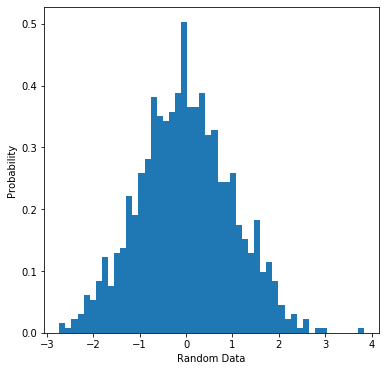

In [170]:
# ***************** histogram ************
 # it is used to check the distributation of the data
    
np.random.seed(421) # use same seed to get the same set of values
x = np.random.normal(size=1000) # Generate random numbers
plt.figure(figsize=(6,6))
plt.hist(x,density=True,bins=50)
plt.ylabel('Probability')
plt.xlabel('Random Data')


In [172]:
# ******************** Seaborn-library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid')



In [174]:
# data - kaggledata of heart failure

heart_failure_data = pd.read_csv("C:/Users/lenovo/python/EDA/heart_failure_clinical_records_dataset.csv")
heart_failure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [206]:
#agg_data1 = heart_failure_data.groupby(['age','DEATH_EVENT'],as_index=False).DEATH_EVENT.sum()

agg_data = heart_failure_data.groupby(['age','DEATH_EVENT']).agg({'age': ['count']})
agg_data.columns = ['age_count']
agg_data = agg_data.reset_index()

agg_data

,age,DEATH_EVENT,age_count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1
...,...,...,...
68,87.0,1,1
69,90.0,0,1
70,90.0,1,2
71,94.0,1,1


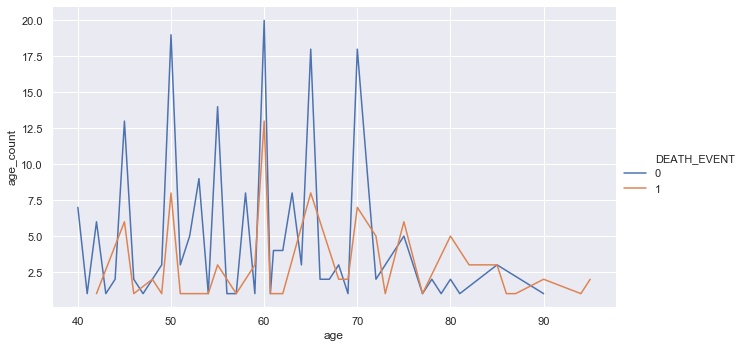

In [199]:
# trend chart based on above data
sns.relplot(x='age',y='age_count',hue='DEATH_EVENT',aspect=16/9,kind='line',data= agg_data);

In [200]:
heart_failure_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

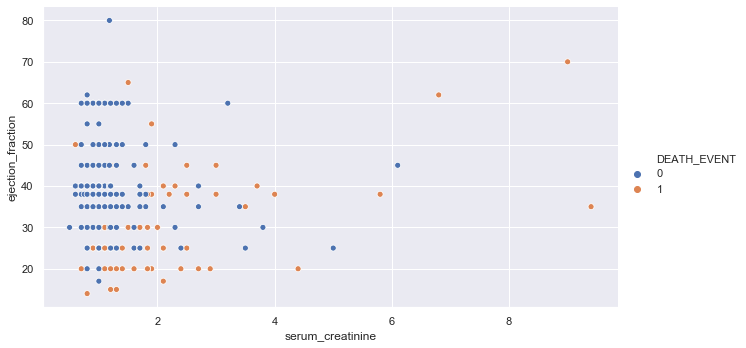

In [202]:
#scatter plot

sns.relplot(x='serum_creatinine',y='ejection_fraction',hue='DEATH_EVENT',
           data=heart_failure_data,aspect=16/9)

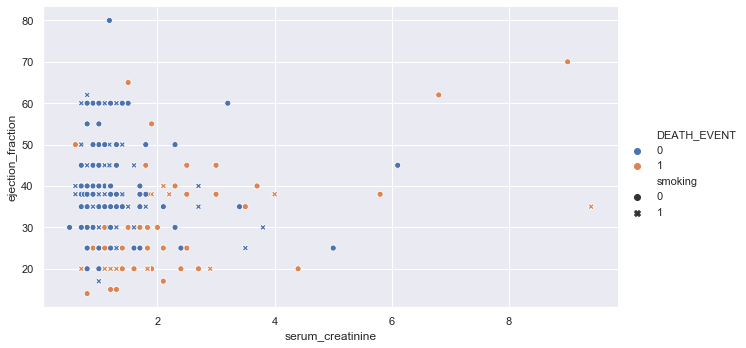

In [204]:
sns.relplot(x='serum_creatinine',y='ejection_fraction',hue='DEATH_EVENT',style='smoking',
           kind='scatter',data=heart_failure_data,aspect=16/9)

In [215]:
# heatmap

agg_data2 = heart_failure_data.groupby(['age','ejection_fraction'],as_index=False).DEATH_EVENT.sum()
agg_data2
agg_data2.columns=['Age','ejection_fraction','Deaths']
agg_data2_p = agg_data2.pivot(index='Age',columns = 'ejection_fraction',values='Deaths')
agg_data2_p.fillna(0,inplace = True)
agg_data2_p.head(20)

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


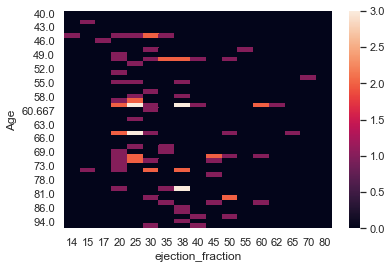

In [216]:
sns.heatmap(agg_data2_p)
plt.show()

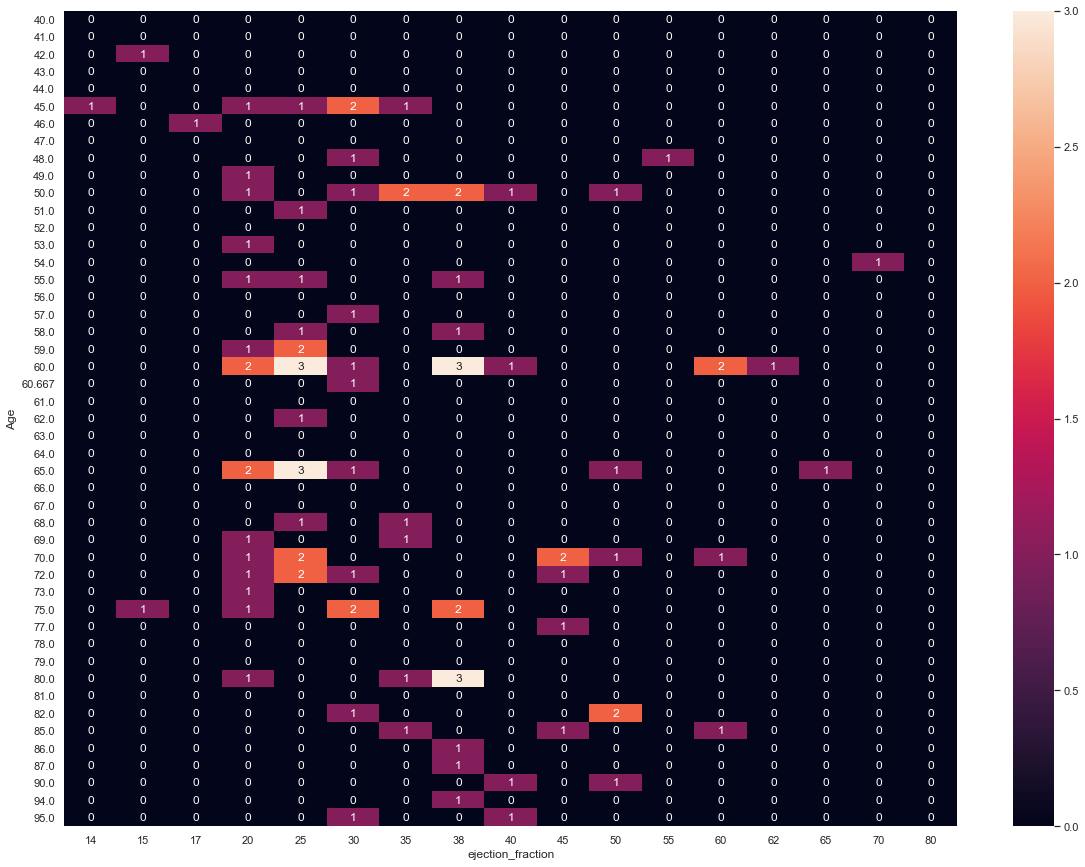

In [217]:
plt.subplots(figsize = (20,15))
sns.heatmap(agg_data2_p,annot = True)
plt.show()

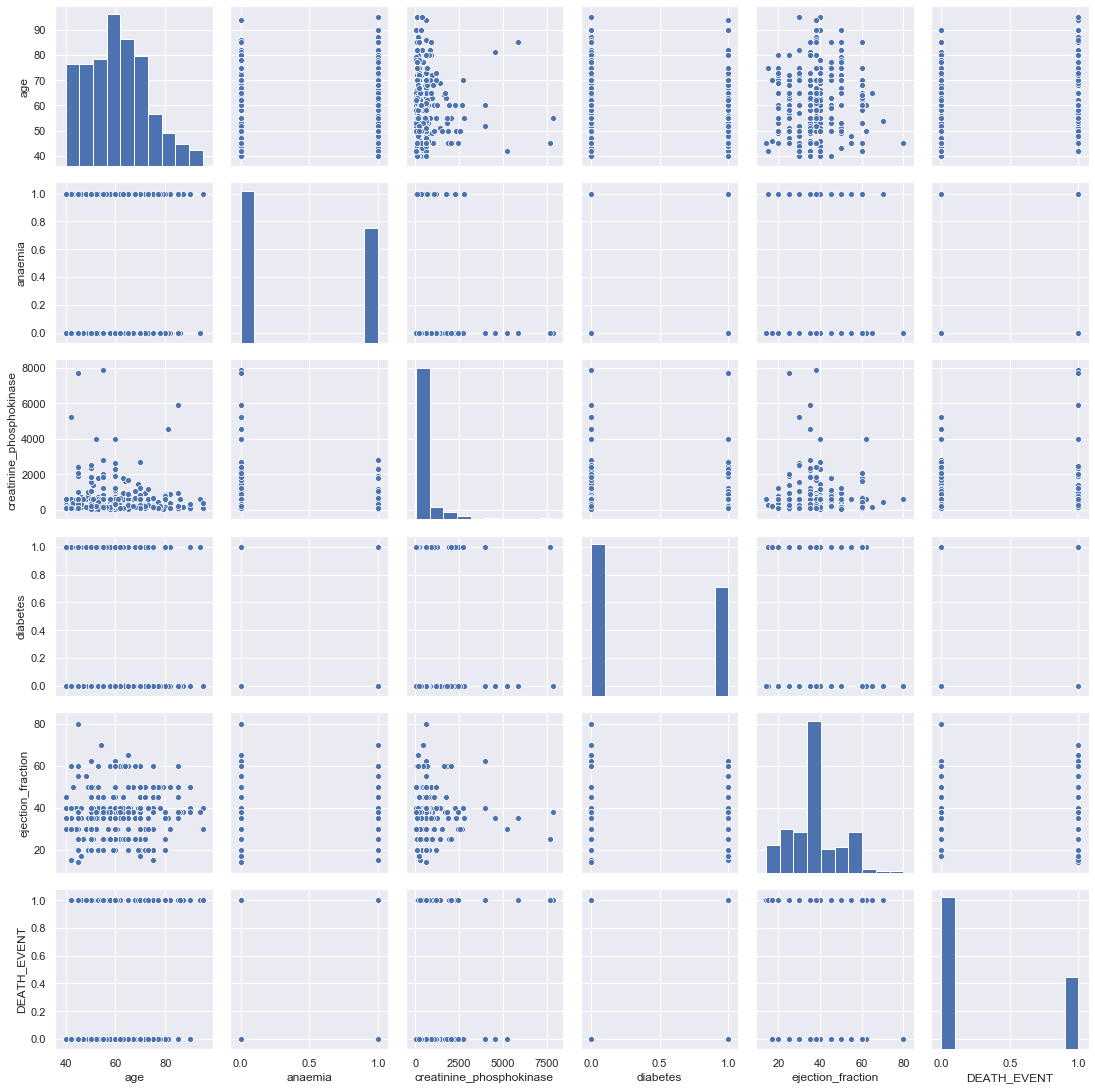

In [221]:
# pair plot ---- plot between all variables of data

subset = heart_failure_data.iloc[:,[0,1,2,3,4,-1]]
print(subset)
sns.pairplot(data=subset)

In [225]:
# interactive plots

from bokeh.plotting import figure , output_file,show
from bokeh.sampledata.iris import flowers

# colormap = {"setosa":'red','versiclor':'green','virginica':'blue'}
# colors = [colormap[x] for x in flowers['species']]

p = figure(title = 'Age vs Ejection Fraction')
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Ejection Fraction'

p.circle(agg_data2['Age'],agg_data2['ejection_fraction'],
        fill_alpha=0.2,size = 10)

output_file('test.html',title='Example') # this will be open in new browser
show(p)